# MUESTREAR UNA PDF

In [1]:
# Aqui cargamos las liberias a usar

import matplotlib.pyplot as plt
import scipy.special
import numpy as np
import math
import random
import seaborn as sns
%matplotlib inline
from scipy import stats

# Encuentra la funcion de distribucion acumulada (CDF) para una distribucion Gaussiana. Escoge un numero aleatorio entre 0 y 1, y usa el CDF para asignar el valor correspondiente de H0. Genera tantos puntos como quieras, y rafica el histograma de H0 para verificar que lo hiciste bien. Usa una media de 70 y un sigma de 2. 

Generamos valores para la funcion acumulada de la Distribucion de Gauss

In [38]:
mu1 = 70
sig1 = 2
h = 0.01

In [39]:
x1 = np.arange(60, 80, h)
a1 = np.empty(len(x1))
a2 = np.empty(len(x1))
y1 = np.empty(len(x1))

La funcion de distribucion acumulada para la distribucion Gaussiana es:

$ F(x) = \frac{1}{2} \left[ 1 + erf \left( \frac{x-\mu}{\sigma \sqrt{2}} \right) \right]$

Evaluamos la funcio:

In [40]:
for i in range(0, len(x1)):
    a1[i] = 0.5 * (1 + math.erf((x1[i] - mu1)/(sig1*math.sqrt(2))))

Graficamos el PDF:

Text(0,0.5,'$F(H_{0})$')

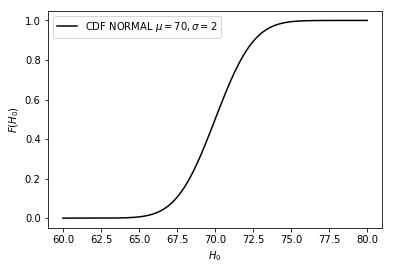

In [41]:
plt.plot(x1,a1, 'black', label="CDF NORMAL $μ = 70, σ = 2$")
plt.legend()
plt.xlabel("$H_{0}$")
plt.ylabel("$F(H_{0})$")

Evaluamos la funcion inversa usando numeros aleatorios entre 0 y 1. Tambien generamos el histograma de H0.

La funcion inversa del CDF es:

$\sigma \sqrt{2}erf^{-1}(2P-1)+\mu$

In [28]:
H=[]
sigm=2
mu=70

for i in range(100000):
    P=random.random() # aleatorio entre 0 y 1
    H.append(sigm*pow(2,0.5)*scipy.special.erfinv(2*P-1)+mu) #funcion inversa de la disribución acumulada.

inter = np.arange(60.0, 80.0, 0.1)

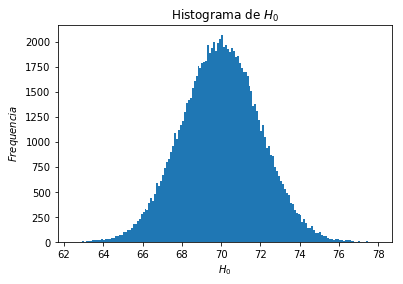

In [31]:
plt.xlim([min(H), max(H)])
plt.hist(H, bins=inter)
plt.title("Histograma de $H_0$")
plt.xlabel("$H_0$") 
plt.ylabel("$Frequencia$")
plt.show()

Trazamos el hitograma normalizado:

/home/luiscantero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


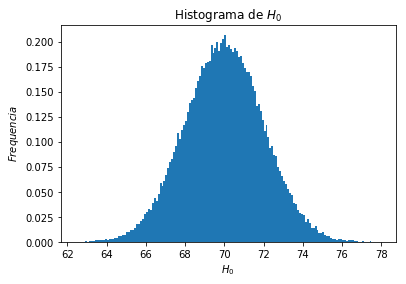

In [33]:
plt.xlim([min(H), max(H)])
plt.hist(H, bins=inter,  normed=1)
plt.title("Histograma de $H_0$")
plt.xlabel("$H_0$") 
plt.ylabel("$Frequencia$")
plt.show()

# DISTRIBUCIONES DE PROBABILIDAD

## Para las distribuciones de Poisson, Distribucion Beta, Binomial y 𝑋2, encontrar el CDF (Cumulative Function Distribution), media, mediana, moda, varianza y desviacion estandar.

## Distribucion normal

La funcion de densidad de la distribucion normal queda definida por: $\frac{1}{σ\sqrt{2π}}e^{-\frac{(x-μ)^2}{2σ^2}}$

Guardamos diferentes valores de media y desviacion estandar (μ y σ):

In [42]:
mu1 = 0
mu2 = -2
sig1 =math.sqrt(5)
sig2 = math.sqrt(0.5)

In [43]:
x13 = np.arange(-5, 5, 0.01)
a13 = np.empty(len(x13))
y13 = np.empty(len(x13))

x14 = np.arange(-5, 5, 0.01)
a14 = np.empty(len(x14))
y14 = np.empty(len(x14))

Evaluamos la funcion de densidad de la distribucion normal y su funcion acumulada:

In [44]:
for i in range(0, len(x13)):
    a13[i] = (1/(sig1*math.sqrt(2*math.pi)))*math.pow(math.e,-1 * math.pow(x13[i]-mu1,2)/(2 * math.pow(sig1,2)))

In [45]:
y13[0] = 0
for j in range(1, len(x13)):
    y13[j] =  (a13[j - 1] + a13[j])/2 *0.01 + y13[j - 1] 

Text(0,0.5,'ACUMULADO')

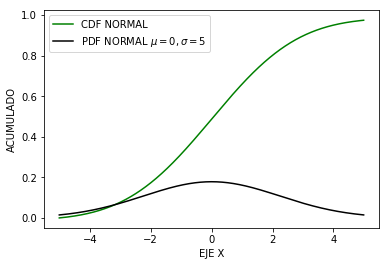

In [46]:
plt.plot(x13,y13, 'green', label="CDF NORMAL")
plt.plot(x13,a13, 'black', label="PDF NORMAL $μ = 0, σ = 5$")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

#### Ahora se utiliza la libreria scipy para crear la grafica de la distribucion y el CDF

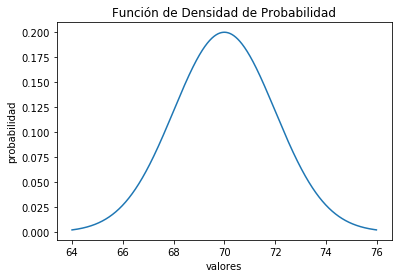

In [18]:
FDP_normal = stats.norm(70, 2).pdf(x13)

plt.plot(x13, FDP_normal, label='FDP nomal')
plt.title('Función de Densidad de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

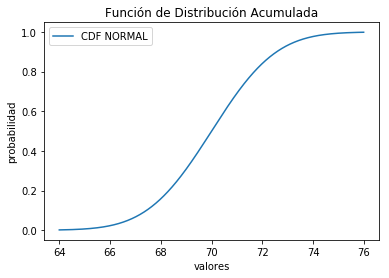

In [25]:
fda_normal = stats.norm(70, 2).cdf(x13) # Función de Distribución Acumulada

plt.plot(x13, fda_normal, label='CDF NORMAL')
plt.title('Función de Distribución Acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend()
plt.show()

## Distribucion de Poisson

La distribucion de probabilidad de Poisson, o probabilidad de que se den x sucesos en un proceso de Poisson con valor promedio λ, vendra dada por:
$p(x;λ)= λ^x / x! * e ^{−λ}$,   donde x =0 ,1,2,...

Guardamos 3 diferentes valores del parametro λ y tres valores diferentes de la variable 'x' para generar 3 graficas diferentes de la funcion de Poisson.

In [50]:
mu1 = 4
mu2 = 25
mu3 = 75

xf = 25
xf2 = 75
xf3 = 120

Para la variable 'x' generamos un arreglo discreto con valores enteros. Tambien generamos un arreglo 'a' que contiene la evaluacion de la funcion de probabilidad de Poisson y un arreglo 'y' que contiene la funcion acumulada de la funcion de probabilidad de Possion de su correspondiente valor de media.

In [51]:
x=np.arange(0, xf, 1)
x2=np.arange(0, xf2, 1)
x3=np.arange(0, xf3, 1)
a1 = np.empty(xf)
y1 = np.empty(xf)
a2 = np.empty(xf2)
y2 = np.empty(xf2)
a3 = np.empty(xf3)
y3 = np.empty(xf3)

Evaluamos la funcion de probabilidad de Poisson y la funcion acumulada.

In [52]:
for i in range(0, xf):
    a1[i] = math.exp(-mu1)*math.pow(mu1,x[i])/math.factorial(x[i])

In [53]:
y1[0] = a1[0]
for j in range(1, xf):
    y1[j] = a1[j] + y1[j-1]

Graficamos el CDF y PDF de la funcion de probabilidad de Possion.

Text(0,0.5,'ACUMULADO')

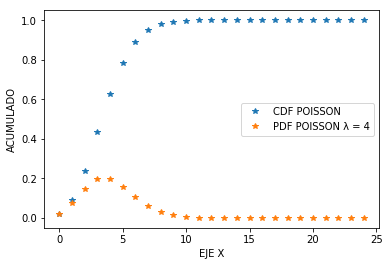

In [55]:
plt.plot(x,y1, "*", label="CDF POISSON")
plt.plot(x,a1, "*", label="PDF POISSON λ = 4")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

- Media

En la distribucion de Poisson, la media coincide con el parametro λ, evaluamos la media con la siguiente expresion: $μ = \sum_{x=0}^{\infty}xp(x;λ)$

In [61]:
xmed1 = np.sum(x*a1)
xmed1

3.9999999999604863

- Mediana

Los limites de la mediana (v) para la distribucion de Possion  son: $λ-Ln(2) ≤ v < λ + 1/3$ 

In [62]:
med11 = mu1 - math.log(2)

In [63]:
med12 = mu1 + 1/3

Limite inferior

In [64]:
med11

3.3068528194400546

Limite superior

In [65]:
med12

4.333333333333333

- Moda

Los limites de la moda (Mo) para la distribucion de Possion  son: $λ - 1  ≤ Mo < λ$ 

In [66]:
mod11 = mu1-1
mod12 = mu1

Limite inferior


In [70]:
mod11

3

Limite superior

In [71]:
mod12

4

- Varianza

La varianza ($σ^{2}$) de la distribucion de Poisson coincide con su valor medio y con el parametro λ que fija la funcion de probabilidad.

In [72]:
var1 = mu1

In [73]:
var1

4

- Desviacion estandar

La desviacion estandar queda entonces como : $σ = \sqrt{λ}$

In [74]:
dest1 = math.sqrt(mu1)

In [75]:
dest1

2.0

Repetimos para otros dos valores del parametro λ:

In [76]:
for i in range(0, xf2):
    a2[i] = math.exp(-mu2)*math.pow(mu2,x2[i])/math.factorial(x2[i])

In [77]:
y2[0] = a2[0]
for j in range(1, xf2):
    y2[j] = a2[j] + y2[j-1]

Text(0,0.5,'ACUMULADO')

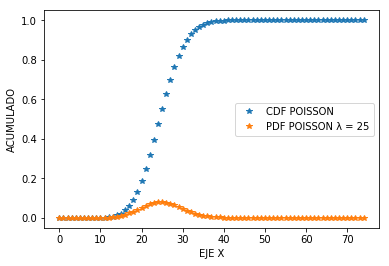

In [78]:
plt.plot(x2,y2, "*", label="CDF POISSON")
plt.plot(x2,a2, "*", label="PDF POISSON λ = 25")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

In [79]:
for i in range(0, xf3):
    a3[i] = math.exp(-mu3)*math.pow(mu3,x3[i])/math.factorial(x3[i])

In [80]:
y3[0] = a3[0]
for j in range(1, xf3):
    y3[j] = a3[j] + y3[j-1]

Text(0,0.5,'ACUMULADO')

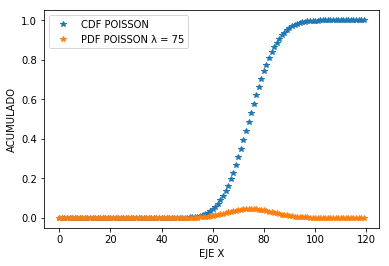

In [81]:
plt.plot(x3,y3, "*", label="CDF POISSON")
plt.plot(x3,a3, "*", label="PDF POISSON λ = 75")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

## Distribucion Binomial

La probabilidad de obtener x exitos, o la distribucion de probabilidad binomial, viene dada por:
$b(x;n,p) = \displaystyle{n \choose k} p^x q^{n−x}$, donde x = 0 ,1,...,n.

Guardamos 3 valores distintos de 'n' (numero de pruebas) y de 'p' (probabilidad de ocurrencia) para realizar tres diferenctes graficas

In [2]:
n1 = 20
p1 = 0.7

n2 = 20
p2 = 0.5

n3 = 40
p3 = 0.5

Generamos el arreglo 'x' que corresponde a las abscisas, el arreglo 'a' que guarda los valores de la evaluacion de la funcion de probabilidad  Binomial y el arreglo 'y' que guarda los valores de la funcion acumulada.

In [3]:
xf4 = n1 + 1
x4 = np.arange(0, xf4, 1)
a4 = np.empty(xf4)
y4 = np.empty(xf4)

xf5 = n2 + 1
x5 = np.arange(0, xf5, 1)
a5 = np.empty(xf5)
y5 = np.empty(xf5)

xf6 = n3 + 1
x6 = np.arange(0, xf6, 1)
a6 = np.empty(xf6)
y6 = np.empty(xf6)

Definimos la funcion 'comb' que genera las combinaciones de 'n' en 'x'. Para poder evaluar el factorial debemos de haber discretizado la variable 'x' en numeros enteros.

In [4]:
def comb(n, k):
    c = math.factorial(n) / (math.factorial(k) * math.factorial((n-k)))
    return c

Evaluamos la funcion de probabilidad Binomial y la funcion acumulada.

In [5]:
for i in range(0, xf4):
    a4[i] = comb(n1,x4[i]) * math.pow(p1, x4[i]) * math.pow((1 - p1), (n1 - x4[i]))

In [6]:
y4[0] = 0
for j in range(1, xf4):
    y4[j] =  a4[j] + y4[j - 1]

Graficamos el CDF y PDF de la funcion de probabilidad Binomial

Text(0,0.5,'ACUMULADO')

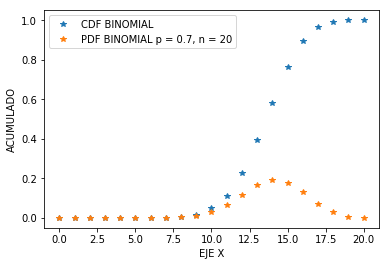

In [7]:
plt.plot(x4,y4, "*", label="CDF BINOMIAL")
plt.plot(x4,a4, "*", label="PDF BINOMIAL p = 0.7, n = 20")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

### Media

Calculamos la media de la distribucion binomial con la siguiente expresion: $μ = \sum_{x=0}^{1}xb(x;n,p)$

In [8]:
xmed4 = np.sum(x4*a4)

In [9]:
xmed4

14.000000000000002

### Mediana

En general, no hay una formula para encontrar la mediana de una distribucion binomial. Hay varios resultados que se han establecido:
    1.- Si np es un entero, entonces la media, mediana y moda coinciden y son iguales a np.
    2.- Una mediana no se puede alejar de la mediana en: |m − np| ≤ min{ ln 2, max{p, 1 − p} }.
    3.- La mediana es unica e igual a redondear np en casos en que p ≤ 1 − ln 2 o p ≥ ln 2 o |m − np| ≤ minimo{p, 1 − p} (excepto para el caso cuando p = ½ y n es impar).    

### Moda

Por lo general, la moda de la distribución binomial B(n, p) es igual a [(n+1)p]. Sin embargo, cuando ( n + 1)p es un número entero y p no es 0 ni 1, entonces la distribución tiene dos modos: (n + 1)p y (n + 1)p - 1. Cuando p es igual a 0 o 1, la moda será 0 y n correspondientemente. Estos casos se pueden resumir a continucacion:

$(n+1)p$ si $(n+1)p$ es 0 o no entero

$(n+1)p$ y $(n+1)p - 1$ si $(n+1)p ∈ {1,...,n}$ 

$n$ si $(n+1)p = n+1$

### Varianza

La varianza ($σ^{2}$) de la distribucion binomial se calcula con la expresion: $σ^{2} = \sum_{x=0}^{1}x^{2}b(x;n,p) - μ^{2} $

In [10]:
var4 = np.sum(x4 * x4 * a4) - xmed4 ** 2

In [11]:
var4

4.199999999999932

### Desviacion estandar

La desviacion estandar queda entonces como : $σ = \sqrt{\sum_{x=0}^{1}x^{2}b(x;n,p) - μ^{2}}$

In [12]:
dest4 = math.sqrt(var4)

In [13]:
dest4

2.049390153191903

Repetimos para otros dos valores de 'p' y 'n'

In [14]:
for i in range(0, xf5):
    a5[i] = comb(n2,x5[i]) * math.pow(p2, x5[i]) * math.pow((1 - p2), (n2 - x5[i]))

In [15]:
y5[0] = 0
for j in range(1, xf5):
    y5[j] =  a5[j] + y5[j - 1]

Text(0,0.5,'ACUMULADO')

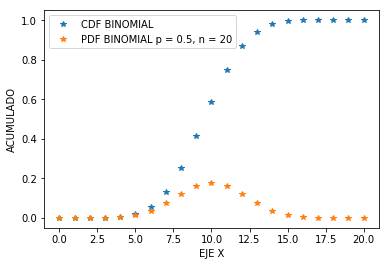

In [16]:
plt.plot(x5,y5, "*", label="CDF BINOMIAL")
plt.plot(x5,a5, "*", label="PDF BINOMIAL p = 0.5, n = 20")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

In [17]:
for i in range(0, xf6):
    a6[i] = comb(n3,x6[i]) * math.pow(p3, x6[i]) * math.pow((1 - p3), (n3 - x6[i]))

In [18]:
y6[0] = 0
for j in range(1, xf6):
    y6[j] =  a6[j] + y6[j - 1]

Text(0,0.5,'ACUMULADO')

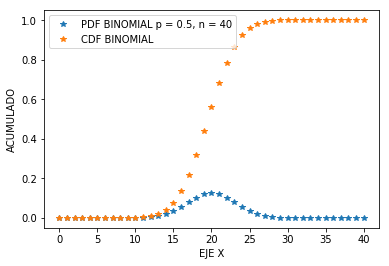

In [19]:
plt.plot(x6,a6, "*", label="PDF BINOMIAL p = 0.5, n = 40")
plt.plot(x6,y6, "*", label="CDF BINOMIAL")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

## Distribucion Beta

La distribucion de probabilidad beta es una funcion de probabilidad continua con dos parametros 'α' y 'β' cuya función de densidad para valores $0 ≤ x ≤ 1$ es
$f(x) = \frac{\Gamma(α + β)}{\Gamma(α)\Gamma(β)}x^{α-1}(1-x)^{β-1}$
donde $\Gamma$ es la funcion gamma.

Generamos tres arreglos 'x' entre  $(0 < x < 1)$ para el eje de las abscisas, tres arreglos 'a' para guardar la evaluacion de la funcion de probabilidad Beta y tres arreglos 'y' para guardar la funcion acumulada.  

In [20]:
x7 = np.arange(0.01,1,0.001)
a7 = np.empty(len(x7))
y7 = np.empty(len(x7))

x8 = np.arange(0.01,1,0.001)
a8 = np.empty(len(x8))
y8 = np.empty(len(x8))

x9 = np.arange(0.01,1,0.001)
a9 = np.empty(len(x9))
y9 = np.empty(len(x9))

alfa1 = 0.5
beta1 = 0.5
alfa2 = 1
beta2 = 1
alfa3 = 2
beta3 = 5


Evaluamos la funcion de probabilidad Beta. Se importo la libreria 'scipy.special' para evaluar la funcion gamma. Tambien evaluamos la funcion acumulada.

In [21]:
for i in range(0, len(x7)):
    a7[i] = (scipy.special.gamma(alfa1 + beta1)/(scipy.special.gamma(alfa1) * scipy.special.gamma(beta1))) * math.pow(x7[i], alfa1 - 1) * math.pow((1 - x7[i]), beta1 - 1)

In [22]:
y7[0] = 0
for j in range(1, len(x7)):
    y7[j] =  (a7[j - 1] + a7[j])/2 *0.001 + y7[j - 1] 

Graficamos el CDF y PDF de la funcion de probabilidad Beta

Text(0,0.5,'ACUMULADO')

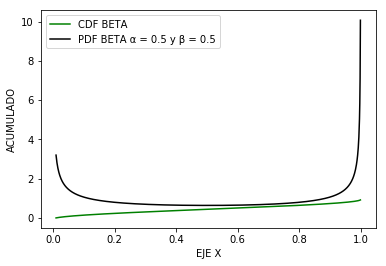

In [23]:
plt.plot(x7,y7, 'green', label="CDF BETA")
plt.plot(x7,a7, 'black', label="PDF BETA α = 0.5 y β = 0.5")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

### Media 

La media de la distribucion beta queda definida por:

$μ = \frac{α}{α + β}$

In [24]:
med7 = alfa1/(alfa1+beta1)

In [25]:
med7

0.5

### Mediana

 No existe una expresion general de forma cerrada para la mediana de la distribucion beta para valores arbitrarios de α y β. Las expresiones de forma cerrada para valores particulares de los parámetros α y β siguen:

• Para casos simétricos α = β , mediana = 1/2.

• Para α = 1 y β > 0, mediana = $1 - 2^{-1/β}$.

• Para α > 0 y β = 1, mediana = $2^{-1/β}$.

• Para α = 3 y β = 2, mediana = 0.6142724318676105 ..., la solucion real a la ecuacion cuartica $1 - 8x^3 + 6x^4 = 0$ 

Una aproximacion razonable del valor de la mediana de la distribucion beta, para α y β mayor o igual a uno, viene dada por la formula:

$mediana = \frac{α - 1/3}{α + β - 2/3}$ para α y β ≥ 1.

### Moda

La moda de la distribucion beta esta dada por la siguiente expresion:

Mo = $\frac{α - 1}{α + β - 2}$ para valores de α y β > 1.

Mo = 1 para valores de α y β entre (0, 1).

0 para α = 1, β > 1

1 para α > 1, β = 1

### Varianza

La varianza de la distribucion beta esta dada por la siguiente expresion:

$σ^{2} = \frac{αβ}{(α+β)^{2}(α+β+1)}$

In [26]:
 var7 = (alfa1*beta1)/(math.pow(alfa1+beta1,2)*(alfa1+beta1+1))

In [27]:
 var7

0.125

### Desviacion estandar

La desviacion estandar queda entonces como : $σ = \sqrt{\frac{αβ}{(α+β)^{2}(α+β+1)}}$

In [28]:
dest7 = math.sqrt(var7)

In [29]:
dest7 

0.3535533905932738

Repetimos para otros dos valores diferentes de α y β.

Un caso especial de la distribución beta es cuando α = 1 y β = 1 que coincide con la distribución uniforme en el intervalo [0, 1]. 

In [30]:
for i in range(0, len(x8)):
    a8[i] = (scipy.special.gamma(alfa2 + beta2)/(scipy.special.gamma(alfa2) * scipy.special.gamma(beta2))) * math.pow(x8[i], alfa2 - 1) * math.pow((1 - x8[i]), beta2 - 1)

In [31]:
y8[0] = 0
for j in range(1, len(x8)):
    y8[j] =  (a8[j - 1] + a8[j])/2 *0.001 + y8[j - 1] 

Text(0,0.5,'ACUMULADO')

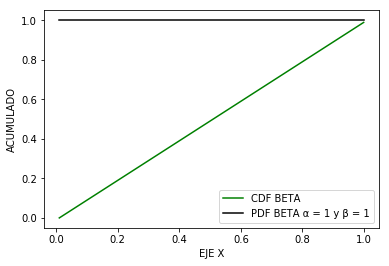

In [32]:
plt.plot(x8,y8, 'green', label="CDF BETA")
plt.plot(x8,a8, 'black', label="PDF BETA α = 1 y β = 1")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

In [33]:
for i in range(0, len(x9)):
    a9[i] = (scipy.special.gamma(alfa3 + beta3)/(scipy.special.gamma(alfa3) * scipy.special.gamma(beta3))) * math.pow(x9[i], alfa3 - 1) * math.pow((1 - x9[i]), beta3 - 1)

In [34]:
y9[0] = 0
for j in range(1, len(x9)):
    y9[j] =  (a9[j - 1] + a9[j])/2 *0.001 + y9[j - 1] 

Text(0,0.5,'ACUMULADO')

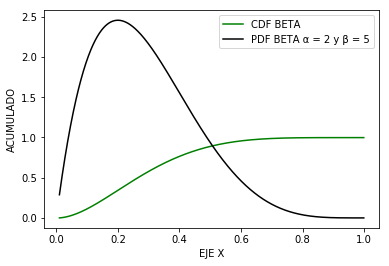

In [35]:
plt.plot(x9,y9, 'green', label="CDF BETA")
plt.plot(x9,a9, 'black', label="PDF BETA α = 2 y β = 5")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

## Distribucion $X^2$

La distribución de Pearson, llamada tambien ji cuadrada(o) o chi cuadrado(a) (χ²), es una distribucion de probabilidad continua con un parametro 
'k' que representa los grados de libertad de la variable aleatoria.
Su funcion de densidad es: $f(x; k) = \frac{1}{2^{k/2}\Gamma{(k/2)}}x^{(k/2)-1}e^{-x/2}$ si x>0 y 0 si x ≤ 0.

Guardamos tres valores diferentes del parametro 'k'.

In [36]:
k1 = 1
k2 = 2
k3 = 4

Generamos tres arreglos 'x' para el eje de las abscisas, tres arreglos 'a' para guardar la evaluacion de la funcion de probabilidad $x^2$ y tres arreglos 'y' para guardar la funcion acumulada.

In [37]:
x10 = np.arange(0.01, 10, 0.01)
a10 = np.empty(len(x10))
y10 = np.empty(len(x10))

x11 = np.arange(0.01, 10, 0.01)
a11 = np.empty(len(x11))
y11 = np.empty(len(x11))

x12 = np.arange(0.01, 10, 0.01)
a12 = np.empty(len(x12))
y12 = np.empty(len(x12))

Evaluamos la funcion de probabilidad $x^2$, aqui tambien usaremos la libreria 'scipy.special' para evaluar la funcion gamma. Tambien evaluamos la funcion acumulada.

In [38]:
for i in range(0, len(x10)):
    a10[i] = (1 / (math.pow(2, k1 / 2) * scipy.special.gamma(k1 / 2))) * math.pow(x10[i], k1/2 - 1) * math.pow(math.e, -x10[i]/2)

In [39]:
y10[0] = 0
for j in range(1, len(x10)):
    y10[j] =  (a10[j - 1] + a10[j])/2 *0.01 + y10[j - 1] 

In [40]:
Graficamos el CDF y PDF de la funcion de probabilidad $x^2$

SyntaxError: invalid syntax (<ipython-input-40-f3158adc7e3d>, line 1)

Text(0,0.5,'ACUMULADO')

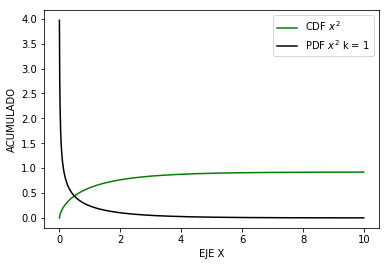

In [41]:
plt.plot(x10,y10, 'green', label="CDF $x^2$")
plt.plot(x10,a10, 'black', label="PDF $x^2$ k = 1")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

### Media

Para la distribucion $X^2$ la media esta dada por:  $μ = k$

In [56]:
xmed10 = k1

In [57]:
xmed10

1

### Mediana

La mediana se puede aproximar con la expresion: $med ≈ k(1 - \frac{2}{9k})^3$

In [43]:
med10 = k1*math.pow(1-2/(9*k1),3)

In [44]:
med10

0.4705075445816187

### Moda

La moda (Mo) es el valor maximo entre $(k-2,0)$

### Varianza

La varianza para la distribucion $X^2$ se describe con la expresion: $σ^2 = 2k$

In [45]:
var10 = 2*k1

In [46]:
var10

2

### Desviacion estandar

La desviacion estandar queda entonces como : $σ = \sqrt{2k}$

In [47]:
dest10 = math.sqrt(var10)

In [48]:
dest10

1.4142135623730951

Repetimos para otros dos valores de 'k'.

In [49]:
for i in range(0, len(x10)):
    a11[i] = (1 / (math.pow(2, k2 / 2) * scipy.special.gamma(k2 / 2))) * math.pow(x11[i], k2/2 - 1) * math.pow(math.e, -x11[i]/2)

In [50]:
y11[0] = 0
for j in range(1, len(x11)):
    y11[j] =  (a11[j - 1] + a11[j])/2 *0.01 + y11[j - 1] 

Text(0,0.5,'ACUMULADO')

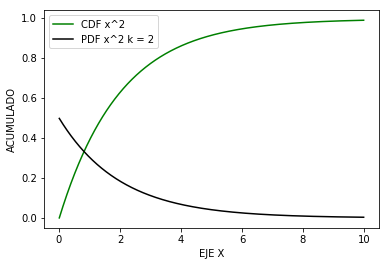

In [51]:
plt.plot(x11,y11, 'green', label="CDF x^2")
plt.plot(x11,a11, 'black', label="PDF x^2 k = 2")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

In [52]:
for i in range(0, len(x10)):
    a12[i] = (1 / (math.pow(2, k3 / 2) * scipy.special.gamma(k3 / 2))) * math.pow(x12[i], k3/2 - 1) * math.pow(math.e, -x12[i]/2)

In [53]:
y12[0] = 0
for j in range(1, len(x12)):
    y12[j] =  (a12[j - 1] + a12[j])/2 *0.01 + y12[j - 1] 

Text(0,0.5,'ACUMULADO')

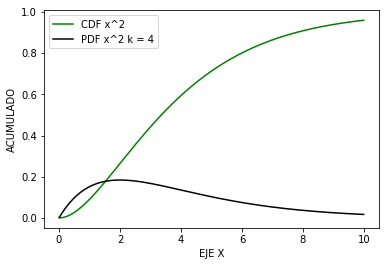

In [54]:
plt.plot(x12,y12, 'green', label="CDF x^2")
plt.plot(x12,a12, 'black', label="PDF x^2 k = 4")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

## Distribucion exponencial

La funcion de densidad de la distribucion exponencial viene dada por: $λe^{-λx}$

Guardamos diferentes valores del parametro λ

In [35]:
med15 = 0.5
med16 = 1.5

In [55]:
x15 = np.arange(0.001, 5, 0.01)
a15 = np.empty(len(x15))
y15 = np.empty(len(x15))

x16 = np.arange(0.001, 5, 0.01)
a16 = np.empty(len(x16))
y16 = np.empty(len(x16))

Evaluamos la funcion de densidad de la distribucion exponencial y su funcion acumulada:

In [57]:
for i in range(0, len(x15)):
    a15[i] = med15*math.pow(math.e,-med15*x15[i])

In [58]:
y15[0] = 0
for j in range(1, len(x15)):
    y15[j] =  (a15[j - 1] + a15[j])/2 *0.01 + y15[j - 1] 

Text(0,0.5,'ACUMULADO')

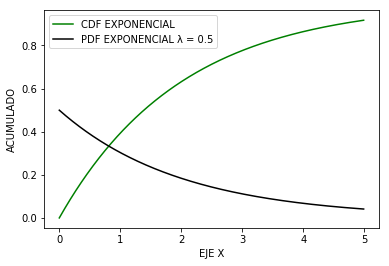

In [59]:
plt.plot(x15,y15, 'green', label="CDF EXPONENCIAL")
plt.plot(x15,a15, 'black', label="PDF EXPONENCIAL λ = 0.5")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

### Media

La media de la distribucion exponencial viene dad por: $1/λ$

In [64]:
media15 = 1/med15

In [66]:
media15

2.0

### Mediana

La mediana de la distribucion exponencial viene dad por: $Ln(2)/λ$

In [67]:
mediana15 = math.log(2)/med15

In [68]:
mediana15

1.3862943611198906

### Moda

La moda de la distribucion exponencial es 0.

### Varianza

La varianza de la distribucion exponencial es $1/λ^2$

In [74]:
varianza15 = 1/(med15 ** 2)

In [76]:
varianza15

4.0

### Desviacion estandar

La desviacion estandar queda definida como: $\sqrt{1/λ^2}$

In [ ]:
dest15 = math.sqrt(varianza15)

In [80]:
dest15

2.0

In [72]:
for i in range(0, len(x16)):
    a16[i] = med16*math.pow(math.e,-med16*x16[i])

In [62]:
y16[0] = 0
for j in range(1, len(x16)):
    y16[j] =  (a16[j - 1] + a16[j])/2 *0.01 + y16[j - 1] 

Text(0,0.5,'ACUMULADO')

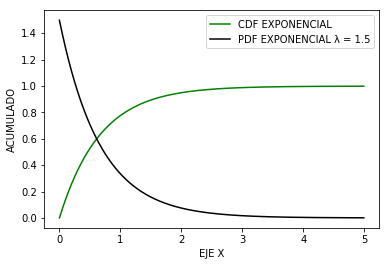

In [83]:
plt.plot(x16,y16, 'green', label="CDF EXPONENCIAL")
plt.plot(x16,a16, 'black', label="PDF EXPONENCIAL λ = 1.5")
plt.legend()
plt.xlabel("EJE X")
plt.ylabel("ACUMULADO")

# Referencias

Johnson, Norman L.; Kotz, Samuel; Balakrishnan, N. (1995). "Chapter 21:Beta Distributions". Continuous Univariate Distributions Vol. 2 (2nd ed.). Wiley.

Wadsworth, George P. and Joseph Bryan (1960). Introduction to Probability and Random Variables. McGraw-Hill.

Feller, William (1971). An Introduction to Probability Theory and Its Applications, Vol. 2. Wiley. 

Panik, Michael J (2005). Advanced Statistics from an Elementary Point of View. Academic Press.

Hahn, Gerald J.; Shapiro, S. (1994). Statistical Models in Engineering (Wiley Classics Library). Wiley-Interscience.

Hamza, K. (1995). The smallest uniform upper bound on the distance between the mean and the median of the binomial and Poisson distributions. Statist. Probab.

Mode, Elmer B. (1990). Elementos de probabilidad y estadística. Reverte.